In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import matplotlib.pyplot as plt

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

In [20]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')

In [2]:
import os

In [3]:
dataset_path="/content/drive/MyDrive/Colab Notebooks/PFA/Dataset/"
path_very_low="/content/drive/MyDrive/Colab Notebooks/PFA/Dataset/very_Low_Turbidity/"
path_low="/content/drive/MyDrive/Colab Notebooks/PFA/Dataset/Low_Turbidity/"

path_med="/content/drive/MyDrive/Colab Notebooks/PFA/Dataset/Medium_Turbidity/"
path_high="/content/drive/MyDrive/Colab Notebooks/PFA/Dataset/High_Turbidity/"

very_low_dir=os.path.join(path_very_low)
low_dir = os.path.join(path_low)

# Directory with Medium_Turbidity images
medium_dir = os.path.join(path_med)

# Directory with High_Turbidity images
high_dir = os.path.join(path_high)

In [4]:
train_vlow_turb = os.listdir(very_low_dir)

train_low_turb = os.listdir(low_dir)

train_medium_turb = os.listdir(medium_dir)

train_high_turb = os.listdir(high_dir)


### Reducing noise while preserving edges

Since we prefer to preserve the edges in the image, we'll use the bilateral denoising filter.

True

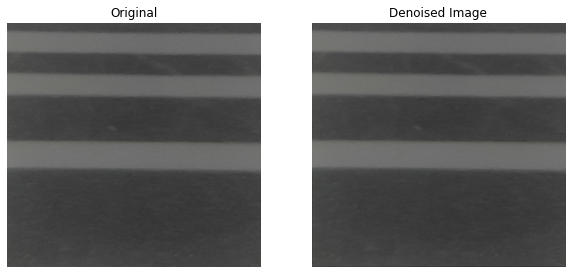

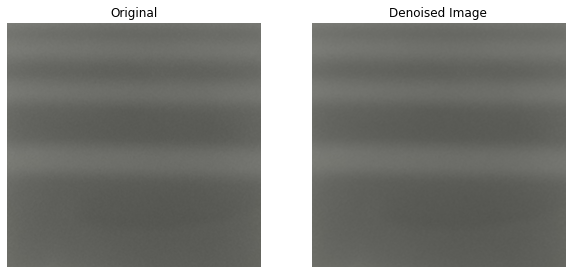

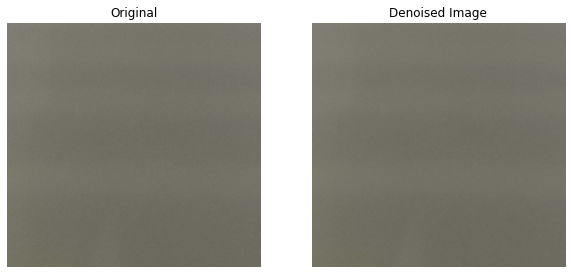

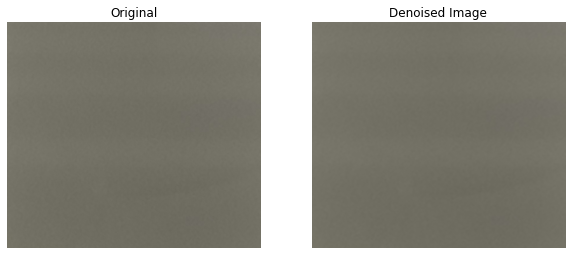

In [24]:
from skimage.restoration import denoise_bilateral
import numpy as np 
import cv2 
from matplotlib import pyplot as plt 

class1 = plt.imread(path_very_low+train_vlow_turb[0])
class2 = plt.imread(path_low+train_low_turb[0])
class3 = plt.imread(path_med+train_medium_turb[0])
class4 = plt.imread(path_high+train_high_turb[0])

# Apply bilateral filter denoising
denoised_image1 = denoise_bilateral(class1, multichannel=True)
denoised_image2 = denoise_bilateral(class2, multichannel=True)
denoised_image3 = denoise_bilateral(class3, multichannel=True)
denoised_image4 = denoise_bilateral(class4, multichannel=True)

# Show original and resulting images
plot_comparison(class1, denoised_image1, 'Denoised Image')
plot_comparison(class2, denoised_image2, 'Denoised Image')
plot_comparison(class3, denoised_image3, 'Denoised Image')
plot_comparison(class4, denoised_image4, 'Denoised Image')

cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/PFA/original_denoised_skimage/4.jpg',denoised_image1)


##Denoising with OPENCV

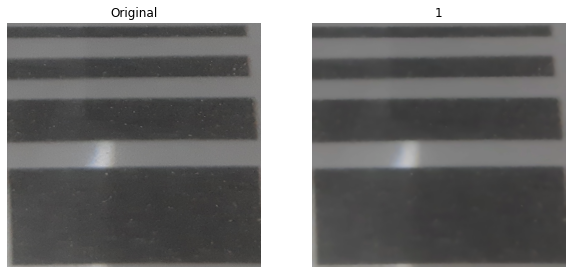

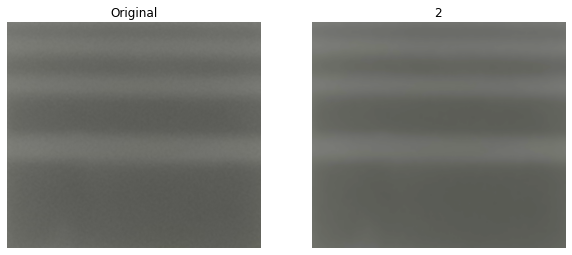

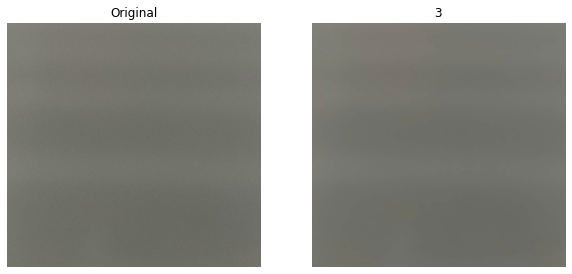

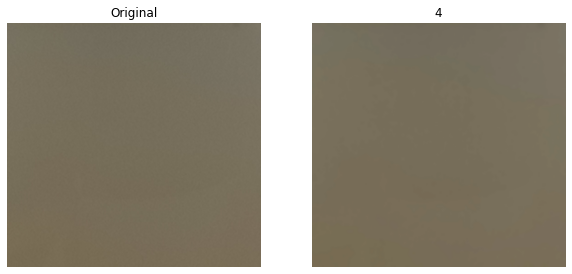

In [19]:
import numpy as np 

import cv2 

from matplotlib import pyplot as plt 

class1 = plt.imread(path_very_low+train_vlow_turb[4],1)
class2 = plt.imread(path_low+train_low_turb[3],1)
class3 = plt.imread(path_med+train_medium_turb[4],1)
class4 = plt.imread(path_high+train_high_turb[9],1)

noiseless_image_colored=[0,0,0,0]
noiseless_image_colored[0] = cv2.fastNlMeansDenoisingColored(class1,None,20,20,7,21) 
noiseless_image_colored[1] = cv2.fastNlMeansDenoisingColored(class2,None,20,20,7,21) 
noiseless_image_colored[2] = cv2.fastNlMeansDenoisingColored(class3,None,20,20,7,21) 
noiseless_image_colored[3] = cv2.fastNlMeansDenoisingColored(class4,None,20,20,7,21) 

plot_comparison(class1, noiseless_image_colored[0], "1")
plot_comparison(class2, noiseless_image_colored[1], "2")
plot_comparison(class3, noiseless_image_colored[2], "3")
plot_comparison(class4, noiseless_image_colored[3], "4")






In [20]:

for i in range(4):
  cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/PFA/denoised/'+str(i)+'.jpg',noiseless_image_colored[i])

##Edges detecting WITH CANNY

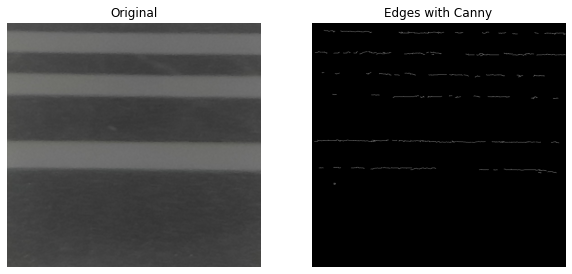

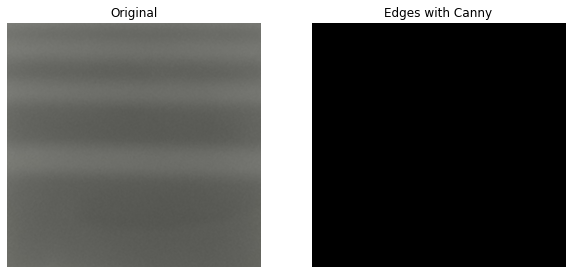

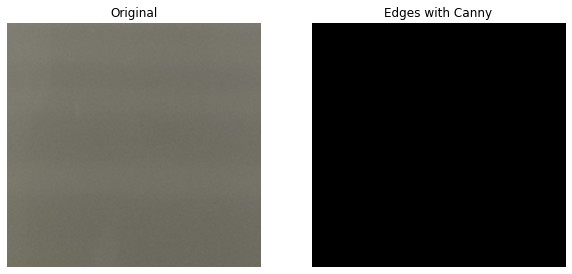

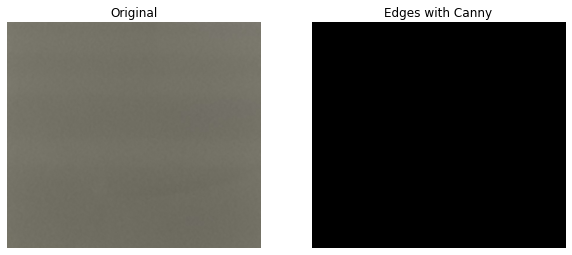

In [33]:
#@title
from skimage.feature import canny
from skimage import color

class1 = plt.imread(path_very_low+train_vlow_turb[0])
class2 = plt.imread(path_low+train_low_turb[0])
class3 = plt.imread(path_med+train_medium_turb[0])
class4 = plt.imread(path_high+train_high_turb[0])

# Convert image to grayscale
gray1 = color.rgb2gray(class1)
gray2 = color.rgb2gray(class2)
gray3 = color.rgb2gray(class3)
gray4 = color.rgb2gray(class4)

# Apply canny edge detector
edge1 = canny(gray1,sigma=0.2)
edge2 = canny(gray2,sigma=0.2)
edge3 = canny(gray3,sigma=0.2)
edge4 = canny(gray4,sigma=0.2)


# Show resulting image
plot_comparison(class1, edge1, "Edges with Canny")
plot_comparison(class2, edge2, "Edges with Canny")
plot_comparison(class3, edge3, "Edges with Canny")
plot_comparison(class4, edge4, "Edges with Canny")

In this case, the image is not grayscale or binary yet. This means we need to perform some image pre-processing steps before looking for the contours. First, we'll transform the image to a 2D array grayscale image and next apply thresholding. Finally, the contours are displayed together with the original image.

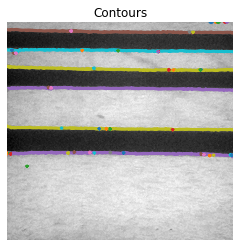

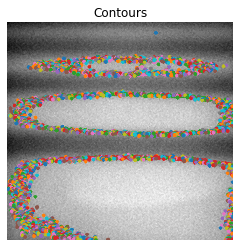

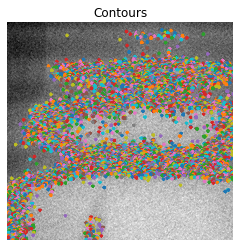

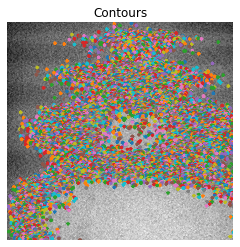

In [31]:

from skimage.io import imread
from skimage.filters import threshold_otsu

from skimage import measure, data



class1 = plt.imread(path_very_low+train_vlow_turb[0])
class2 = plt.imread(path_low+train_low_turb[0])
class3 = plt.imread(path_med+train_medium_turb[0])
class4 = plt.imread(path_high+train_high_turb[3])

# Convert image to grayscale
gray1 = color.rgb2gray(class1)
gray2 = color.rgb2gray(class2)
gray3 = color.rgb2gray(class3)
gray4 = color.rgb2gray(class4)

thresh1 = threshold_otsu(gray1)
thresh2 = threshold_otsu(gray2)
thresh3= threshold_otsu(gray3)
thresh4 = threshold_otsu(gray4)


binary1 = gray1 > thresh1
binary2 = gray2 > thresh2
binary3 = gray3 > thresh3
binary4 = gray4 > thresh4


# Apply canny edge detector
contours1 = measure.find_contours(binary1,level=0.8)
contours2 = measure.find_contours(binary2,level=0.8)
contours3 = measure.find_contours(binary3,level=0.8)
contours4 = measure.find_contours(binary4,level=0.8)




# Find the contours with a constant level value of 0.8

# Shows the image with contours found
show_image_contour(gray1, contours1)
show_image_contour(gray2, contours2)
show_image_contour(gray3, contours3)
show_image_contour(gray4, contours4)

###Count the number of dots in each image

class1 dots number: 30.
class2 dots number: 895.
class3 dots number: 2376.
class4 dots number: 3152.


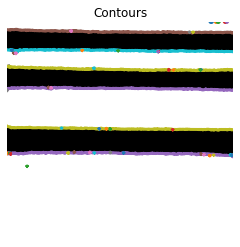

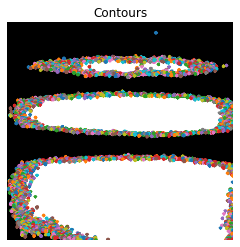

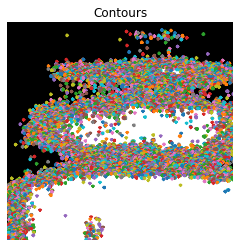

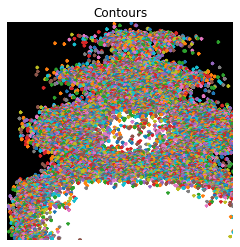

In [34]:
import numpy as np
# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours1]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 6

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours1 if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found
show_image_contour(binary1, contours1)

# Print the dice's number
print('class1 dots number: {}.'.format(len(dots_contours)))


shape_contours = [cnt.shape[0] for cnt in contours2]
max_dots_shape = 6
dots_contours = [cnt for cnt in contours2 if np.shape(cnt)[0] < max_dots_shape]
show_image_contour(binary2, contours2)
print('class2 dots number: {}.'.format(len(dots_contours)))


shape_contours = [cnt.shape[0] for cnt in contours3]
max_dots_shape = 6
dots_contours = [cnt for cnt in contours3 if np.shape(cnt)[0] < max_dots_shape]
show_image_contour(binary3, contours3)
print('class3 dots number: {}.'.format(len(dots_contours)))



shape_contours = [cnt.shape[0] for cnt in contours4]
max_dots_shape = 6
dots_contours = [cnt for cnt in contours4 if np.shape(cnt)[0] < max_dots_shape]
show_image_contour(binary4, contours4)
print('class4 dots number: {}.'.format(len(dots_contours)))